# 底打ちどころを探る

## 目的

時価総額の大きい銘柄の値動きのトレンドを読むことで、底打ちどころを探る

In [26]:
import datetime
import re

import matplotlib.font_manager as fm
from matplotlib import dates as mdates
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

In [27]:
def get_code_into(code):
    symbol = '%s.T' % code
    ticker = yf.Ticker(symbol)
    df = ticker.history(start='2025-03-24', interval='1d')
    print(code, ticker.info['longName'])
    list_new = list()
    for dt_ts in df.index:
        m = pattern.match(str(dt_ts))
        if m:
            list_new.append(pd.to_datetime(m.group(1)))
        else:
            print('Error!')
    df.index = list_new   
    base = df.at[dt, 'Close']
    ser = df['Close'] / base
    print(ser.tail(3))

### 東証で時価総額上位

Reference: https://www.nikkei.com/marketdata/ranking-jp/market-cap-high/

In [28]:
pattern = re.compile(r'([0-9]{4}-[0-9]{2}-[0-9]{2}).*')

In [29]:
pattern_code = re.compile(r'^(.+)([0-9A]{4}).+$')

ods_name = 'mkt_capital_top_30.ods'
df_ods = pd.read_excel(ods_name)
list_code = list()
for name in df_ods['銘柄名']:
    m = pattern_code.match(name)
    if m:
        print(m.group(1))
        code = m.group(2)
        list_code.append(code)
    else:
        print('ERROR!', name)
print(list_code)

トヨタ
ソニーＧ
三菱ＵＦＪ
日立
ファストリ
中外薬
キーエンス
ＮＴＴ
任天堂
三井住友ＦＧ
ＫＤＤＩ
リクルート
伊藤忠
ＳＢ
三菱商
東京海上
ＳＢＧ
東エレク
三菱重
ＪＴ
みずほＦＧ
三井物
信越化
ホンダ
武田
第一三共
富士通
ＯＬＣ
キヤノン
ＨＯＹＡ
['7203', '6758', '8306', '6501', '9983', '4519', '6861', '9432', '7974', '8316', '9433', '6098', '8001', '9434', '8058', '8766', '9984', '8035', '7011', '2914', '8411', '8031', '4063', '7267', '4502', '4568', '6702', '4661', '7751', '7741']


In [30]:
dt = pd.to_datetime('2025-03-27')
dt

Timestamp('2025-03-27 00:00:00')

In [31]:
summary = pd.DataFrame()
for code in list_code:
    symbol = '%s.T' % code
    ticker = yf.Ticker(symbol)
    df = ticker.history(start='2025-03-24', interval='1d')
    if len(df) == 0:
        print('### no data in', symbol)
        continue
    list_new = list()
    for dt_ts in df.index:
        m = pattern.match(str(dt_ts))
        if m:
            list_new.append(pd.to_datetime(m.group(1)))
        else:
            print('Error!')
    df.index = list_new            
    base = df.at[dt, 'Close']
    ser = df['Close'] / base
    summary[code] = ser

summary

,7203,6758,8306,6501,9983,4519,6861,9432,7974,8316,...,8411,8031,4063,7267,4502,4568,6702,4661,7751,7741
2025-03-24,1.012197,0.974625,1.001377,1.001070,0.973763,0.983236,0.988840,0.984000,0.969175,0.992380,...,0.992525,0.970608,0.980535,1.031250,0.994306,0.994916,0.986138,0.998713,0.984179,0.988415
2025-03-25,1.019091,0.975142,0.993115,1.006153,0.979355,0.999574,0.988193,0.983333,0.975975,0.980088,...,0.978256,0.975727,0.984738,1.032280,0.995401,0.994113,0.964055,1.002575,0.994658,1.003673
2025-03-26,1.020859,0.997411,0.991049,1.014714,0.993548,1.007387,0.993692,0.992000,1.027199,0.985988,...,0.986410,0.987450,0.990047,1.025412,0.992992,0.996521,0.964055,0.996138,0.996507,1.006782
2025-03-27,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2025-03-28,0.971927,0.994548,0.967868,0.985554,0.983656,1.000426,0.973799,0.994573,0.982321,0.967552,...,0.974713,0.988415,0.986347,0.973980,0.999776,0.989749,1.011334,0.984516,0.989727,0.991806
2025-03-31,0.941515,0.977414,0.923112,0.925094,0.947527,0.965904,0.945819,0.981683,0.916591,0.932891,...,0.931264,0.940060,0.948075,0.944093,0.987690,0.947127,0.955635,0.950000,0.954387,0.948290
2025-04-01,0.946734,0.977414,0.915309,0.919743,0.955699,0.964342,0.936115,0.980326,0.925204,0.920354,...,0.930805,0.948623,0.947851,0.945851,1.009176,1.004316,0.960492,0.943226,0.965276,0.931619
2025-04-02,0.955911,0.957944,0.901308,0.927501,0.991398,0.935502,0.935145,0.968114,0.944696,0.904867,...,0.922069,0.936199,0.945837,0.957103,0.997762,0.966280,0.957416,0.924677,0.964660,0.930206
2025-04-03,0.906424,0.911734,0.836814,0.867576,0.974194,0.941611,0.898916,0.966757,0.913871,0.835300,...,0.848736,0.914876,0.921218,0.934951,1.016115,0.979768,0.929080,0.919355,0.916992,0.887821
2025-04-04,0.866475,0.868380,0.765894,0.817014,0.965591,0.945305,0.884522,0.977612,0.904533,0.768191,...,0.753333,0.890698,0.871531,0.883966,1.002014,0.976531,0.909812,0.941290,0.880214,0.883865


In [32]:
summary

,7203,6758,8306,6501,9983,4519,6861,9432,7974,8316,...,8411,8031,4063,7267,4502,4568,6702,4661,7751,7741
2025-03-24,1.012197,0.974625,1.001377,1.001070,0.973763,0.983236,0.988840,0.984000,0.969175,0.992380,...,0.992525,0.970608,0.980535,1.031250,0.994306,0.994916,0.986138,0.998713,0.984179,0.988415
2025-03-25,1.019091,0.975142,0.993115,1.006153,0.979355,0.999574,0.988193,0.983333,0.975975,0.980088,...,0.978256,0.975727,0.984738,1.032280,0.995401,0.994113,0.964055,1.002575,0.994658,1.003673
2025-03-26,1.020859,0.997411,0.991049,1.014714,0.993548,1.007387,0.993692,0.992000,1.027199,0.985988,...,0.986410,0.987450,0.990047,1.025412,0.992992,0.996521,0.964055,0.996138,0.996507,1.006782
2025-03-27,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2025-03-28,0.971927,0.994548,0.967868,0.985554,0.983656,1.000426,0.973799,0.994573,0.982321,0.967552,...,0.974713,0.988415,0.986347,0.973980,0.999776,0.989749,1.011334,0.984516,0.989727,0.991806
2025-03-31,0.941515,0.977414,0.923112,0.925094,0.947527,0.965904,0.945819,0.981683,0.916591,0.932891,...,0.931264,0.940060,0.948075,0.944093,0.987690,0.947127,0.955635,0.950000,0.954387,0.948290
2025-04-01,0.946734,0.977414,0.915309,0.919743,0.955699,0.964342,0.936115,0.980326,0.925204,0.920354,...,0.930805,0.948623,0.947851,0.945851,1.009176,1.004316,0.960492,0.943226,0.965276,0.931619
2025-04-02,0.955911,0.957944,0.901308,0.927501,0.991398,0.935502,0.935145,0.968114,0.944696,0.904867,...,0.922069,0.936199,0.945837,0.957103,0.997762,0.966280,0.957416,0.924677,0.964660,0.930206
2025-04-03,0.906424,0.911734,0.836814,0.867576,0.974194,0.941611,0.898916,0.966757,0.913871,0.835300,...,0.848736,0.914876,0.921218,0.934951,1.016115,0.979768,0.929080,0.919355,0.916992,0.887821
2025-04-04,0.866475,0.868380,0.765894,0.817014,0.965591,0.945305,0.884522,0.977612,0.904533,0.768191,...,0.753333,0.890698,0.871531,0.883966,1.002014,0.976531,0.909812,0.941290,0.880214,0.883865


In [33]:
df_ranking = summary.tail(1).iloc[0].sort_values(ascending=False)
df_ranking

4519    1.162381
9433    1.062577
2914    1.040958
9434    1.022107
9432    1.020353
4661    1.009677
9983    1.003226
7267    0.993319
8001    0.984189
7011    0.982875
4502    0.963295
6861    0.945011
6702    0.944948
8058    0.943496
7974    0.942430
6501    0.926966
8031    0.919745
7203    0.918481
7741    0.903928
6758    0.900571
4568    0.884273
8035    0.878645
8766    0.877945
7751    0.873639
9984    0.852375
6098    0.851762
4063    0.849597
8316    0.784907
8411    0.777471
8306    0.772320
Name: 2025-04-23 00:00:00, dtype: float64

In [34]:
list_ranking = df_ranking.index[0:7]
for code in list_ranking:
    get_code_into(code)
    print()

print('Median')
print(summary.median(axis=1).tail(3))

4519 Chugai Pharmaceutical Co., Ltd.
2025-04-21    1.196193
2025-04-22    1.180992
2025-04-23    1.162381
Name: Close, dtype: float64

9433 KDDI Corporation
2025-04-21    1.040213
2025-04-22    1.054780
2025-04-23    1.062577
Name: Close, dtype: float64

2914 Japan Tobacco Inc.
2025-04-21    1.015569
2025-04-22    1.020838
2025-04-23    1.040958
Name: Close, dtype: float64

9434 SoftBank Corp.
2025-04-21    1.007996
2025-04-22    1.011759
2025-04-23    1.022107
Name: Close, dtype: float64

9432 Nippon Telegraph and Telephone Corporation
2025-04-21    1.007463
2025-04-22    1.016961
2025-04-23    1.020353
Name: Close, dtype: float64

4661 Oriental Land Co., Ltd.
2025-04-21    1.006129
2025-04-22    1.007742
2025-04-23    1.009677
Name: Close, dtype: float64

9983 Fast Retailing Co., Ltd.
2025-04-21    0.994624
2025-04-22    0.987957
2025-04-23    1.003226
Name: Close, dtype: float64

Median
2025-04-21    0.902038
2025-04-22    0.909500
2025-04-23    0.934698
dtype: float64


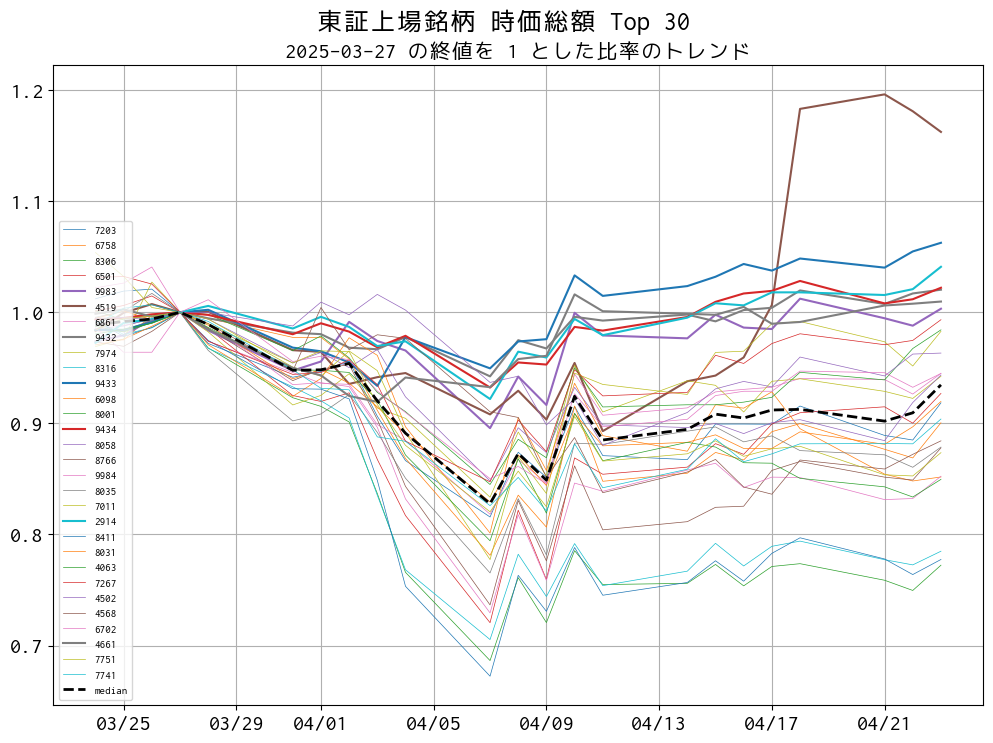

In [35]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(top=0.91)

for colname in summary.columns:
    if colname in list_ranking:
        width = 1.5
        lstyle = 'solid'
    else:
        width = 0.5
        lstyle = 'solid'

    ax.plot(summary[colname], lw=width, ls=lstyle, label=colname)

ax.plot(summary.median(axis=1), lw=2, color='black', ls='dashed', label='median')

ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
#ax.xaxis.set_ticks(df.index)

m = pattern.match(str(dt))
date_str = m.group(1)
fig.suptitle('東証上場銘柄 時価総額 Top 30')
ax.set_title('%s の終値を 1 とした比率のトレンド' % date_str, fontsize=16)
ax.grid()
ax.legend(loc='lower left', fontsize=8)

plt.savefig('report_bottom_out.png' )
plt.show()